In [ ]:
pip install pandas numpy gym torch scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import gym
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import random
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [ ]:
df = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [ ]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [ ]:
print(f"\nDataset shape: {df.shape}")



Dataset shape: (10000, 10)


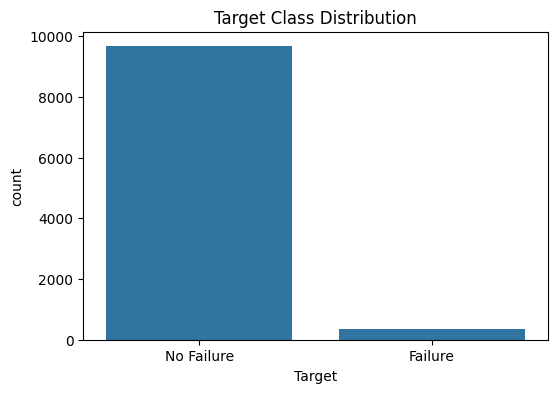

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title('Target Class Distribution')
plt.xticks(ticks=[0,1], labels=["No Failure", "Failure"])
plt.show()


In [ ]:
# Count of each class in the Target column
class_counts = df["Target"].value_counts()
print(" Failure Class Counts:\n")
print(class_counts)


print("\n Labeled Counts:")
print(f"No Failure: {class_counts.get(0, 0)}")
print(f"Failure: {class_counts.get(1, 0)}")


 Failure Class Counts:

Target
0    9661
1     339
Name: count, dtype: int64

 Labeled Counts:
No Failure: 9661
Failure: 339


In [ ]:
# Features and target
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'

X = df[features]
y = df[target]

# Normalize features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

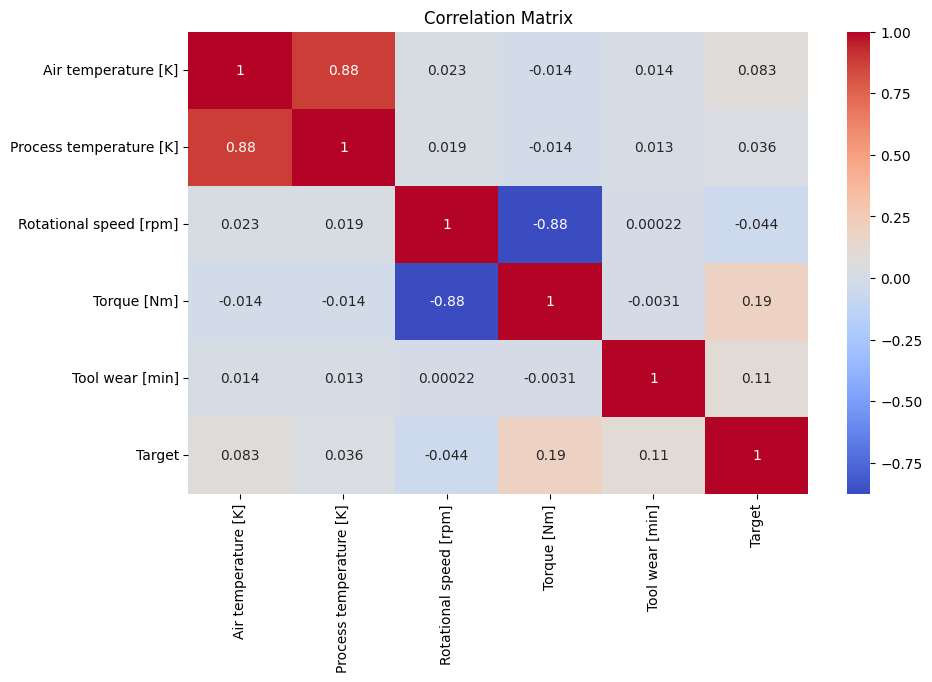

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build DataFrames for environments
df_train = pd.DataFrame(X_train, columns=features)
df_train["Target"] = y_train.values

df_test = pd.DataFrame(X_test, columns=features)
df_test["Target"] = y_test.values

In [ ]:
# Upsample minority class
df_majority = df_train[df_train.Target == 0]
df_minority = df_train[df_train.Target == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1).reset_index(drop=True)

In [ ]:
print(f"\nTrain Set Shape: {df_train.shape}")
print(f"Test Set Shape: {df_test.shape}")
print("Train Class Distribution:\n", df_train["Target"].value_counts())
print("Test Class Distribution:\n", df_test["Target"].value_counts())



Train Set Shape: (8000, 6)
Test Set Shape: (2000, 6)
Train Class Distribution:
 Target
0    7722
1     278
Name: count, dtype: int64
Test Class Distribution:
 Target
0    1939
1      61
Name: count, dtype: int64


In [ ]:
# Custom Gym Environment
class MaintenanceEnv(gym.Env):
    def __init__(self, df):
        super(MaintenanceEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.state = None
        self.index = 0
        self.action_space = gym.spaces.Discrete(2)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)

    def reset(self):
        self.index = 0
        self.state = self.df.iloc[self.index, :-1].values.astype(np.float32)
        return self.state

    def step(self, action):
        label = self.df.iloc[self.index, -1]
        #  Reward shaping
        if action == label:
            reward = 5 if label == 1 else 1
        else:
            reward = -5 if label == 1 else -1

        self.index += 1
        done = self.index >= len(self.df)
        next_state = np.zeros_like(self.state) if done else self.df.iloc[self.index, :-1].values.astype(np.float32)
        return next_state, reward, done, {}

In [ ]:
# DQN Model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
# DQN Agent
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.model = DQN(state_dim, action_dim)
        self.target_model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()
        self.memory = []
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.batch_size = 32
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.target_model.to(self.device)

    def remember(self, s, a, r, ns, d):
        self.memory.append((s, a, r, ns, d))
        if len(self.memory) > 10000:
            self.memory.pop(0)

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, 1)
        state = torch.tensor(state).unsqueeze(0).float().to(self.device)
        q = self.model(state)
        return torch.argmax(q).item()

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        s, a, r, ns, d = zip(*batch)

        s = torch.tensor(s).float().to(self.device)
        a = torch.tensor(a).unsqueeze(1).to(self.device)
        r = torch.tensor(r).float().unsqueeze(1).to(self.device)
        ns = torch.tensor(ns).float().to(self.device)
        d = torch.tensor(d).float().unsqueeze(1).to(self.device)

        q_values = self.model(s).gather(1, a)
        q_next = self.target_model(ns).max(1)[0].detach().unsqueeze(1)
        q_target = r + (1 - d) * self.gamma * q_next

        loss = self.criterion(q_values, q_target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())

In [ ]:
# Train the agent
reward_history = []
epsilon_history = []

env = MaintenanceEnv(df_train)
agent = DQNAgent(state_dim=5, action_dim=2)

episodes = 202
for e in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        agent.replay()
        state = next_state
        total_reward += reward

    agent.update_target()
    agent.epsilon = max(agent.epsilon * agent.epsilon_decay, agent.epsilon_min)

    reward_history.append(total_reward)
    epsilon_history.append(agent.epsilon)

    print(f"Episode {e+1}/{episodes}, Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

<ipython-input-20-3ed2f108ae6a>:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  s = torch.tensor(s).float().to(self.device)


Episode 1/202, Reward: -66, Epsilon: 0.99
Episode 2/202, Reward: -74, Epsilon: 0.99
Episode 3/202, Reward: -14, Epsilon: 0.99
Episode 4/202, Reward: 142, Epsilon: 0.98
Episode 5/202, Reward: 244, Epsilon: 0.98
Episode 6/202, Reward: 44, Epsilon: 0.97
Episode 7/202, Reward: 306, Epsilon: 0.97
Episode 8/202, Reward: 348, Epsilon: 0.96
Episode 9/202, Reward: 318, Epsilon: 0.96
Episode 10/202, Reward: 440, Epsilon: 0.95
Episode 11/202, Reward: 264, Epsilon: 0.95
Episode 12/202, Reward: 480, Epsilon: 0.94
Episode 13/202, Reward: 452, Epsilon: 0.94
Episode 14/202, Reward: 504, Epsilon: 0.93
Episode 15/202, Reward: 788, Epsilon: 0.93
Episode 16/202, Reward: 652, Epsilon: 0.92
Episode 17/202, Reward: 338, Epsilon: 0.92
Episode 18/202, Reward: 708, Epsilon: 0.91
Episode 19/202, Reward: 846, Epsilon: 0.91
Episode 20/202, Reward: 734, Epsilon: 0.90
Episode 21/202, Reward: 904, Epsilon: 0.90
Episode 22/202, Reward: 958, Epsilon: 0.90
Episode 23/202, Reward: 776, Epsilon: 0.89
Episode 24/202, Rewar

In [ ]:
# Save model
torch.save(agent.model.state_dict(), "dqn_model.pth")

In [ ]:
# Evaluation on Test Set
test_env = MaintenanceEnv(df_test)
state = test_env.reset()
done = False
test_preds = []
test_labels = []

while not done:
    state_tensor = torch.tensor(state).float().unsqueeze(0).to(agent.device)
    q_values = agent.model(state_tensor)
    action = torch.argmax(q_values).item()
    test_preds.append(action)
    test_labels.append(int(test_env.df.iloc[test_env.index, -1]))
    state, _, done, _ = test_env.step(action)

print(confusion_matrix(test_labels, test_preds))
print(classification_report(test_labels, test_preds, target_names=["No Failure", "Failure"]))

[[1900   39]
 [  15   46]]
              precision    recall  f1-score   support

  No Failure       0.99      0.98      0.99      1939
     Failure       0.54      0.75      0.63        61

    accuracy                           0.97      2000
   macro avg       0.77      0.87      0.81      2000
weighted avg       0.98      0.97      0.98      2000



In [ ]:
from sklearn.metrics import accuracy_score

# Compute testing accuracy
accuracy = accuracy_score(test_labels, test_preds)
print(f"\n Test Accuracy: {accuracy * 100:.2f}%")



 Test Accuracy: 97.30%


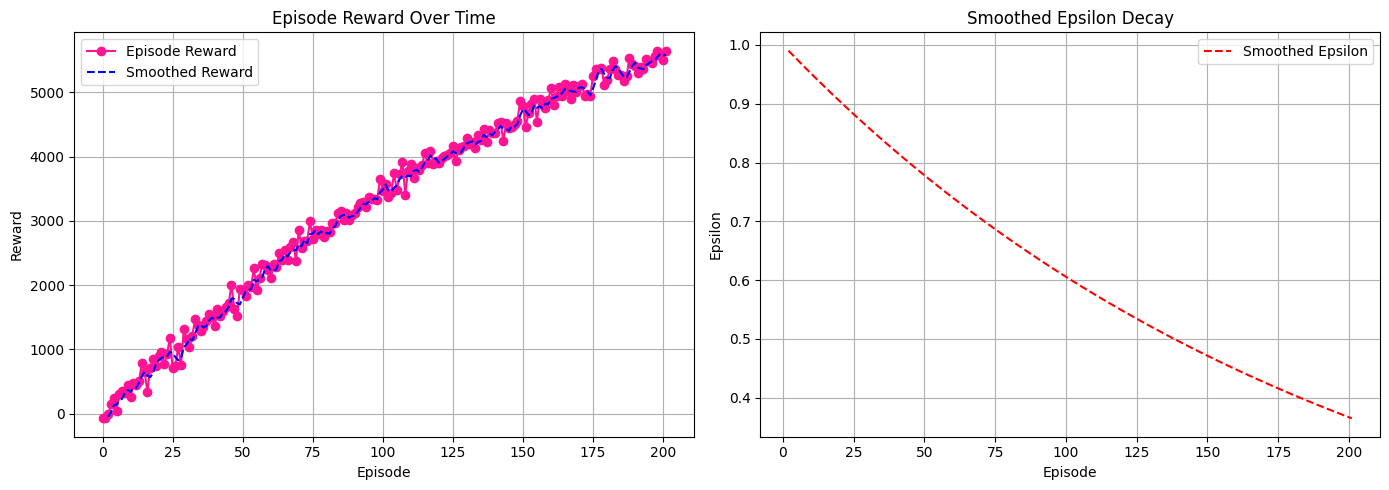

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a 1x2 grid for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Reward plot
ax1.plot(reward_history, label='Episode Reward', marker='o', color='deeppink')
ax1.plot(pd.Series(reward_history).rolling(3).mean(), label='Smoothed Reward', linestyle='--', color='blue')
ax1.set_title("Episode Reward Over Time")
ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward")
ax1.legend()
ax1.grid(True)
# Epsilon plot
smoothed_eps = pd.Series(epsilon_history).rolling(3).mean()
ax2.plot(smoothed_eps, label='Smoothed Epsilon', color='red', linestyle='--')
ax2.set_title("Smoothed Epsilon Decay")
ax2.set_xlabel("Episode")
ax2.set_ylabel("Epsilon")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


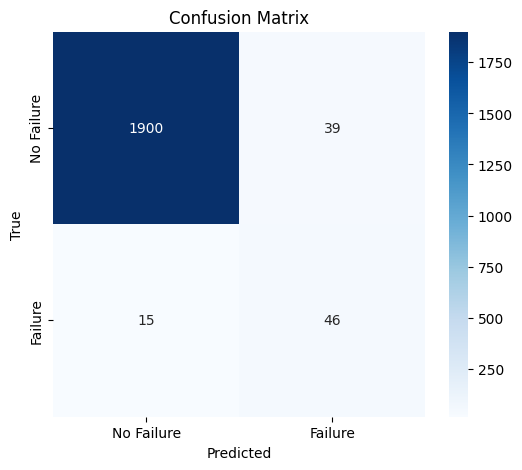

In [ ]:
import seaborn as sns

# Plot confusion matrix as heatmap
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
!pip install gradio --quiet


In [ ]:
import gradio as gr
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define features
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

df = pd.read_csv("predictive_maintenance.csv")
scaler = MinMaxScaler()
scaler.fit(df[features])

# Load model
class DQN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, output_dim)
        )
    def forward(self, x):
        return self.fc(x)

model = DQN(5, 2)
model.load_state_dict(torch.load("dqn_model.pth", map_location=torch.device("cpu")))
model.eval()

# Prediction function
def predict_failure(air_temp, proc_temp, rpm, torque, wear):
    input_data = [[air_temp, proc_temp, rpm, torque, wear]]
    scaled = scaler.transform(input_data)
    input_tensor = torch.tensor(scaled, dtype=torch.float32)
    with torch.no_grad():
        pred = torch.argmax(model(input_tensor)).item()
    return "✅ No Failure, NO Maintenance Required" if pred == 0 else "⚠️ Failure is likely, Maintenance Required!"

# Gradio interface
demo = gr.Interface(
    fn=predict_failure,
    inputs=[
        gr.Number(label="Air temperature [K]"),
        gr.Number(label="Process temperature [K]"),
        gr.Number(label="Rotational speed [rpm]"),
        gr.Number(label="Torque [Nm]"),
        gr.Number(label="Tool wear [min]"),
    ],
    outputs="text",
    title="🔧 Predictive Maintenance",
    description="Enter machine sensor values to predict failure and maintenance status"
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://15468d07ad78c9d5a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Features used in model
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Load original dataset to fit the scaler
df = pd.read_csv("predictive_maintenance.csv")
scaler = MinMaxScaler()
scaler.fit(df[features])

# Load the trained model
class DQN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, output_dim)
        )
    def forward(self, x):
        return self.fc(x)

model = DQN(input_dim=5, output_dim=2)
model.load_state_dict(torch.load("dqn_model.pth", map_location=torch.device("cpu")))
model.eval()

# Take inputs from user
print("\n🔧 Enter machine sensor values:")
user_input = []
for feature in features:
    val = float(input(f"{feature}: "))
    user_input.append(val)

# Normalize input
user_input_scaled = scaler.transform([user_input])

# Convert to tensor and predict
input_tensor = torch.tensor(user_input_scaled, dtype=torch.float32)
with torch.no_grad():
    output = model(input_tensor)
    prediction = torch.argmax(output).item()

# Show result
if prediction == 0:
    print("\n✅ Prediction: No Failure, NO Maintenance Required")
else:
    print("\n⚠️ Prediction: Failure is likely, Maintenance Required!")



🔧 Enter machine sensor values:
Air temperature [K]: 255


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

